In [111]:
import pandas as pd
from os.path import join, dirname, isdir
import seaborn as sns
import matplotlib.pyplot as plt

Combine all results data

In [105]:
models = '../models'
def get_data(models, dirname):
    try:
        data  = pd.read_csv(join(models, dirname, 'epoch_loss.csv'))
        optim = pd.read_csv(join(models, dirname, 'optimizer.csv'))
    except:
        return None
    data['optimizer'] = optim['name'].values[0]
    data['dirname'] = dirname
    data['job_id'] = data['dirname'].str.extract(r'(.*)_[0-9]+')
    return data

jobs = filter(lambda p: isdir(join(models, p)), os.listdir(models))
df = pd.concat([get_data(models, job) for job in jobs])
df

,epoch,accuracy,categorical_accuracy,epoch_time,loss,top_k_categorical_accuracy,val_accuracy,val_categorical_accuracy,val_loss,val_top_k_categorical_accuracy,optimizer,dirname,job_id
0,0,0.960651,0.960651,1187.640418,0.145986,0.998803,0.220177,0.220177,13.694115,0.228467,Nadam,18089307_4,18089307
1,1,0.961517,0.961517,1089.068708,0.138320,0.999613,0.230705,0.230705,13.378916,0.230705,Nadam,18089307_4,18089307
2,2,0.961213,0.961213,1099.932372,0.151486,0.999926,0.230705,0.230705,11.557586,0.230705,Nadam,18089307_4,18089307
3,3,0.960577,0.960577,1099.001507,0.168548,1.000000,0.230705,0.230705,11.017899,0.230705,Nadam,18089307_4,18089307
4,4,0.959988,0.959988,1097.658838,0.181303,0.999926,0.230705,0.230705,12.613845,0.230705,Nadam,18089307_4,18089307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,0.413793,0.413793,5.399133,2.875679,0.655172,0.000000,0.000000,3.259073,0.000000,Adam,my_model,NaN
6,6,0.517241,0.517241,5.202822,2.821097,0.620690,0.000000,0.000000,3.259204,0.000000,Adam,my_model,NaN
7,7,0.517241,0.517241,5.439876,2.794938,0.620690,0.000000,0.000000,3.259332,0.000000,Adam,my_model,NaN
8,8,0.517241,0.517241,6.160942,2.792031,0.620690,0.000000,0.000000,3.259449,0.000000,Adam,my_model,NaN


In [108]:
data = df[df['job_id'].isin(['18102942'])]
data.shape

(447, 13)

In [160]:
molten = data.melt(id_vars=['epoch', 'optimizer'],
                   var_name='metric',
                   value_vars=['accuracy', 'val_accuracy'],
                   value_name='accuracy')
molten

,epoch,optimizer,metric,accuracy
0,0,RMSprop,accuracy,0.594333
1,1,RMSprop,accuracy,0.603590
2,2,RMSprop,accuracy,0.540984
3,3,RMSprop,accuracy,0.638362
4,4,RMSprop,accuracy,0.646071
...,...,...,...,...
889,65,Adadelta,val_accuracy,0.000000
890,66,Adadelta,val_accuracy,0.000000
891,67,Adadelta,val_accuracy,0.000000
892,68,Adadelta,val_accuracy,0.000000


(0.0, 1.0)

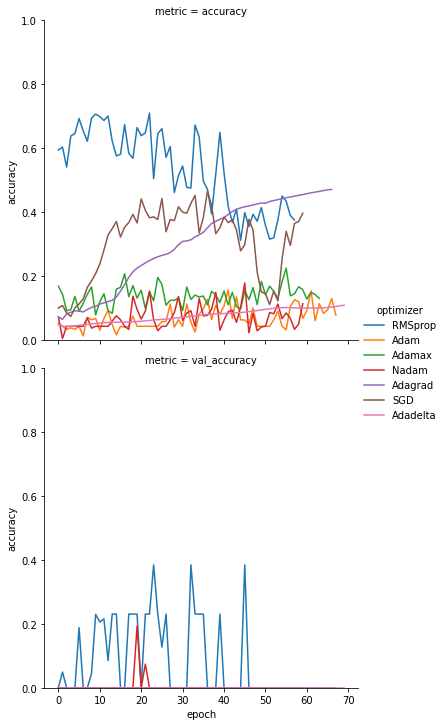

In [164]:
sns.relplot(data=molten, x='epoch', y='accuracy',
    hue='optimizer', kind='line', row='metric')
plt.ylim(0, 1)